In [1]:
import os, time, json
import tmdbsimple as tmdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
from matplotlib.ticker import FuncFormatter
import numpy as np
import scipy.stats as stats
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
from tqdm.notebook import tqdm_notebook
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
tmdb.API_KEY = "2e7e239c25274c3cdc1060a9df22dfc7"

In [4]:
# Load data
basics=pd.read_csv('Data/refined_basics.csv')
basics.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,33802,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,"2,001.00",NaN,20,Short
1,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,"2,001.00",NaN,118,"Comedy,Fantasy,Romance"
2,39544,tt0040241,short,Color Rhapsodie,Color Rhapsodie,0,"2,021.00",NaN,6,Short
3,43546,tt0044326,short,Abstronic,Abstronic,0,"2,021.00",NaN,6,Short
4,49493,tt0050396,short,Final Curtain,Final Curtain,0,"2,012.00",NaN,20,"Horror,Short"


In [5]:
FOLDER="Data/Hypothesis_Testing_data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

[]

In [6]:
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    
    movie_info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1' ] =='US':
            movie_info['certification'] = c['certification']
    return movie_info


def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        file_data = json.load(file)
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file)

#### Decided to get the most recent 5-year movie data

In [7]:
YEARS_TO_GET=list(range(2018, 2023))

In [8]:
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE_YEAR = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE_YEAR)

    if file_exists == False:
        print(f'Creating{JSON_FILE_YEAR} for API results for year = {YEAR}.')
        with open (JSON_FILE_YEAR, 'w') as f:
            json.dump([{'imdb_id':0}],f)

    else:
        print(f'The file {JSON_FILE_YEAR} already exists.')

    df_year = basics.loc[basics['startYear'] == YEAR].copy()
    movie_ids = df_year['tconst']
        
        # Create an empty list to store movie information
    movie_info_list = []
    errors=[]    
        # Iterate over movie IDs for the current year
    for movie_id in tqdm_notebook(movie_ids, f'Movies from {YEAR}'):
        try:
            temp = get_movie_with_rating(movie_id)
            movie_info_list.append(temp)
            time.sleep(0.02)
        except Exception as e:
            errors.append([movie_id, e])
        
        # Write the movie information to the JSON file
    write_json(movie_info_list, JSON_FILE_YEAR)

    final_year_df2 = pd.read_json(JSON_FILE_YEAR)
    csv_fname = f'{FOLDER}final_tmdb_data_{YEAR}.csv.gz'
    final_year_df2.to_csv(csv_fname, compression='gzip', index=False)

YEARS:   0%|          | 0/5 [00:00<?, ?it/s]

CreatingData/Hypothesis_Testing_data/tmdb_api_results_2018.json for API results for year = 2018.


Movies from 2018:   0%|          | 0/41823 [00:00<?, ?it/s]

CreatingData/Hypothesis_Testing_data/tmdb_api_results_2019.json for API results for year = 2019.


Movies from 2019:   0%|          | 0/38167 [00:00<?, ?it/s]

CreatingData/Hypothesis_Testing_data/tmdb_api_results_2020.json for API results for year = 2020.


Movies from 2020:   0%|          | 0/34014 [00:00<?, ?it/s]

CreatingData/Hypothesis_Testing_data/tmdb_api_results_2021.json for API results for year = 2021.


Movies from 2021:   0%|          | 0/31104 [00:00<?, ?it/s]

CreatingData/Hypothesis_Testing_data/tmdb_api_results_2022.json for API results for year = 2022.


Movies from 2022:   0%|          | 0/25836 [00:00<?, ?it/s]

#### Combine All API results

In [38]:
import glob
tmdb_files = sorted(glob.glob("Data/Hypothesis_Testing_data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data/Hypothesis_Testing_data\\final_tmdb_data_2018.csv.gz',
 'Data/Hypothesis_Testing_data\\final_tmdb_data_2019.csv.gz',
 'Data/Hypothesis_Testing_data\\final_tmdb_data_2020.csv.gz',
 'Data/Hypothesis_Testing_data\\final_tmdb_data_2021.csv.gz',
 'Data/Hypothesis_Testing_data\\final_tmdb_data_2022.csv.gz']

In [39]:
# Combine with concat to load all files
df=pd.concat([pd.read_csv(f, lineterminator='\n') for f in tmdb_files])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43326 entries, 0 to 7201
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                43326 non-null  object 
 1   adult                  43321 non-null  float64
 2   backdrop_path          27026 non-null  object 
 3   belongs_to_collection  1903 non-null   object 
 4   budget                 43321 non-null  float64
 5   genres                 43321 non-null  object 
 6   homepage               12952 non-null  object 
 7   id                     43321 non-null  float64
 8   original_language      43321 non-null  object 
 9   original_title         43321 non-null  object 
 10  overview               42574 non-null  object 
 11  popularity             43321 non-null  float64
 12  poster_path            40891 non-null  object 
 13  production_companies   43321 non-null  object 
 14  production_countries   43321 non-null  object 
 15  rel

In [32]:
fname = f'Data/tmdb_results_combined2018_2022.csv.gz'
df.to_csv(fname, compression='gzip',index=False)

In [34]:
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,tt0069049,0.00,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,NaN,"12,000,000.00","[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,"299,782.00",en,The Other Side of the Wind,...,0.00,122.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making.,The Other Side of the Wind,0.00,6.70,195.00,R\r
2,tt0137818,0.00,NaN,NaN,0.00,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,"748,589.00",en,Housesitter: The Night They Saved Siegfried's ...,...,0.00,0.00,[],Released,NaN,Housesitter: The Night They Saved Siegfried's ...,0.00,0.00,0.00,\r


## Hypothesis Testing

### Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

##### State the Hypothesis and Null Hypothesis- 
Null Hypothesis: The MPAA ratings of a movie have NO effect on revenue the movie generate


- .
Alternative Hypothesis: The MPAA ratings of a movie affect the revenue the movie generates.

In [35]:
# Droping row with nulls in Certification and Revenue
df_h=df.dropna(subset=['revenue','certification'])

KeyError: ['certification']

ValueError: Could not interpret input 'certification'

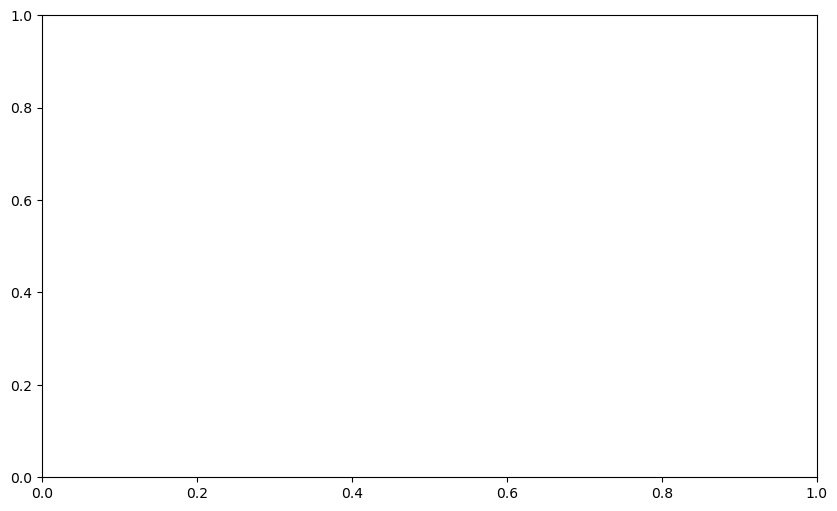

In [37]:
fi,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_h,x='certification',y='revenue')
formatter = FuncFormatter(lambda x, _: f"${int(x / 1e6):,}M")
ax.yaxis.set_major_formatter(formatter);

- Date type: Numeric
- 
More than 2 groups/samples (6 groups)
Choose to use ANOVA for hypothesis testing

Assumptions of ANOV- A:

No significant out
- liers
Equal v
- riance
Normality

### Testing ANOVA Assumptions

In [ ]:
# Create groups dicts
groups = {}

# Loop through all unique categories
for certification in df_h['certification'].unique():
    data = df_h.loc[df_h['certification']==certification,'revenue'].copy()
    groups[certification]=data

groups.keys()

## Check for Outliers

In [ ]:
groups_clean= {}

for group,data in groups.items():
    outliers=np.abs(stats.zscore(data))>3
    n_outliers=np.sum(outliers)

    print(f"- For {group}, there were {n_outliers} outliers removed.")
    clean_data = data[~outliers]
    groups_clean[group] = clean_data

groups_clean.keys()

## Check for Normality

In [ ]:
norm_results=[]
for group, data in groups_clean.items():
    stat,p=stats.normaltest(data)
    norm_results.append({'group':group,'n':len(data),'p':p,'test stat':stat,'sig?':p<0.05})
norm_results_df=pd.DataFrame(norm_results)
norm_results_df

- None of the groups are normally distributed, BUT our groups are greater than n=15 so we can safely disregard the assumption of normality.

### Test for Equal Variance

In [ ]:
res = stats.levene(*groups_clean.values())
res

- The null hypothiese of the Levene's test is that the samples DO have equal variance- 
Therefore, our significant p-value indicates that we do NOT have equal varince
- 
Therefore we will run the Kruskal-Wallis test instead of the ANOVA test.

### Final Hypothiese Test

In [ ]:
res = stats.kruskal(*groups_clean.values())
res

In [ ]:
res.pvalue<0.05

- Our p-value is less than alpha 0.05, so in conclusion the MPAA ratings of a movie DOES affect the revenue the movie generates.

### Do movies that are over 2.5 hours(150mins) long earn more revenue than movies that are 1.5 hours (90mins)long (or less)?

 State the Hypothesis and Null Hypothesis
- 
Null Hypothesis: Movies over 150 minutes earn the same revenue as the movies that are less than 90 minutes long
- .
Alternative Hypothesis: There is a dfferent in revenue between movies that are over 150 minutes and movies that are less than 90 minutes long.

In [ ]:
# Dropping rows with null values in 'revenue' and 'runtime' columns.
df_2=df.dropna(subset=['revenue', 'runtime'])

In [ ]:
# Create df for 2 groups
movie_over=df_2.loc[df_2['runtime']>150].copy()
movie_less=df_2.loc[df_2['runtime']<90].copy()
movie_150=movie_over['revenue']
movie_90=movie_less['revenue']

In [ ]:
combined_df = pd.concat([movie_over, movie_less], ignore_index=True)
combined_df['movie_over150']=combined_df['runtime']>150

In [ ]:
combined_df['movie_over150'].value_counts()

In [ ]:
combined_df.info()

In [ ]:
# Visualizing Sample means
fig, ax = plt.subplots(figsize= (12,4))
## Barplot
sns.barplot(data=combined_df, x='movie_over150',y='revenue')
fig.suptitle('Charges for smokers vs. nons-smokers',fontsize='xx-large')
formatter = FuncFormatter(lambda x, _: f"${int(x / 1e6):,}M")
ax.yaxis.set_major_formatter(formatter);

- Date type: Numeric- 
2 groups/samples

Choose to use 2 sample ttest for hypothesis testing

Assumptions of 2-sample T-Tes- t:

No significant out
- liers
Nor
- mality
Equal Variance

### Testing 2-sample T-test Assumptions
#### 
Check for Outliers

In [ ]:
#Find and remove outliers for movies over 150mins
zscores=stats.zscore(movie_150)
outliers=abs(zscores)>3
np.sum(outliers)

In [ ]:
movie_150=movie_150[~outliers]

In [ ]:
#Find and remove outliers for movies less than 90mins
zscores=stats.zscore(movie_90)
outliers=abs(zscores)>3
np.sum(outliers)

In [ ]:
movie_90=movie_90[~outliers]

### Check for Normality

In [ ]:
# Normality check for movies over 150mins
norm_res=stats.normaltest(movie_150)
norm_res

In [ ]:
norm_res.pvalue<0.05

- Distribution of movies over 150mins is not normal.

In [ ]:
# Normality check for movies less than 90mins
norm_res=stats.normaltest(movie_90)
norm_res

In [ ]:
norm_res.pvalue<0.05

- Distribution of movies less than 90mins is not normal.
- 
Althought the distributions of the two groups are not normal, we can enough sample size in both groups to satisfy the assumption

### Check for Equal Variance

In [ ]:
result = stats.levene(movie_150,movie_90)
result

In [ ]:
result.pvalue<0.05

- The null hypothesis of the Levene's test is that the samples DO have equal variance.
- 
Therefore, our significant p-value indicates that we do NOT have equal varaince
- 

Therefore, we will run the Welch's t-test instead of the default (for scipy's ttest_ind change the equal_var argument to False)

### Final Hypothiese Test

In [ ]:
# Since not equal variances, set equal_var =False
result = stats.ttest_ind(movie_150,movie_90,equal_var=False)
result

In [ ]:
result.pvalue<0.05

- Our Welch's T-Test returns a p-value < .05 therefore we can reject the null hypothesis and support the alternative hypothesis that There is a significant difference in revenue for movies that are over 150 mins and movies that are less than 90 mins.
- 
In order to know which group has the higher or lower revenue, we look at the actual means of our final groups.

In [ ]:
plt.bar(['Moives Over 150mins','Movies Less than 90mins'],[movie_150.mean(),movie_90.mean()]);

- Movies over 150 minutes have higher average revenue than movies that are less than 90 minutes.